## Image Classification - (Building, forest, glacier, mountain, street)

In [9]:
# required imports
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import random
import pickle
import keras
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from keras.models import Sequential
import time

In [6]:
#declaring constants
CON_LAYER = 3
DENSE_LAYER = [256,128,64]
ACTIVATION_FUNCTION = 'relu'

In [7]:
#support functions
def milliseconds_to_time(data):
    seconds=(data/1000)%60
    seconds = int(seconds)
    minutes=(data/(1000*60))%60
    minutes = int(minutes)
    hours=(data/(1000*60*60))%24
    return ("%d:%d:%d" % (hours, minutes, seconds))

In [8]:
# getting the folder path
DIRECTORY = r'/Users/nyvara/Desktop/MyFiles/ML_FILES/ImageClassification/intel-image-classification'
VALIDATION_DIRECTORY = r'/Users/nyvara/Desktop/MyFiles/ML_FILES/ImageClassification/validation'
FOLDERS = ['test', 'train']
CLASS = ['buildings','forest','glacier','mountain','sea','street']

In [10]:
# appending image path to list
train_data = []
validation_data = []

def process_data(folder, classificaiton, image_url):
    arr = cv2.imread(image_url)
    arr = cv2.resize(arr, (150, 150))
    label = CLASS.index(classification)
    data_point = {
        "type": folder,
        "class": classification,
        "img_path": image_url,
        "processed_data": arr
    }
    if folder == 'train':
        train_data.append(data_point)
    elif folder == 'validation':
        validation_data.append(data_point)
    
for folder in FOLDERS:
    folder_path = os.path.join(DIRECTORY, folder)
    for classification in CLASS:
        image_path = os.path.join(folder_path, classification)
        for image in os.listdir(image_path):
            try:
                image_url = os.path.join(image_path,image)
                process_data(folder, classification, image_url)
            except Exception as e:
                print(e)

In [11]:
# randomizing the training data
random.shuffle(train_data)

In [12]:
# declaring input and output variables

# training set
X = []
y = []

for key in train_data:
    X.append(key['processed_data']/255)
    y.append(CLASS.index(key['class']))

X = np.array(X)
y = np.array(y)


In [14]:
# reshaping the data
X = X.reshape(-1, 150, 150, 3)

In [15]:
# saving the processed data as pickle file 
pickle.dump(X, open('trainX.pkl', 'wb'))
pickle.dump(y, open('trainy.pkl', 'wb'))

OverflowError: cannot serialize a bytes object larger than 4 GiB

In [16]:
# building model
def buildModel(X, y, con_layer, dense_layer, activation_function):
    model = Sequential()
    i = 0
    while(i < con_layer):
        # CONV LAYER
        model.add(Conv2D(100,(3,3),activation = activation_function))
        model.add(MaxPool2D(2,2))
        i+=1
    #FLATTERN
    model.add(Flatten())
    #DENSE LAYER
    model.add(Dense(150, input_shape = X.shape[1:], activation = 'relu'))
    j = 0
    while(j < len(dense_layer)):
        # CONV LAYER
        model.add(Dense(dense_layer[j], activation = 'relu'))
        j+=1
    #O/P LAYER
    model.add(Dense(6, activation = 'sigmoid'))
    #COMPILE
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = buildModel(X,y, CON_LAYER, DENSE_LAYER, ACTIVATION_FUNCTION)

In [18]:
# fitting the model
start_time = time.time()
graph = model.fit(X, y, epochs = 10, batch_size = 100, validation_split = 0.1)
end_time = time.time() - start_time
print(milliseconds_to_time(end_time))
model.save('image_prediction.model')

Train on 15330 samples, validate on 1704 samples
Epoch 1/10
15330/15330 [==============================] - 493s 32ms/step - loss: 1.0146 - acc: 0.6005 - val_loss: 0.8362 - val_acc: 0.6808
Epoch 2/10
15330/15330 [==============================] - 488s 32ms/step - loss: 0.7009 - acc: 0.7371 - val_loss: 0.7796 - val_acc: 0.7201
Epoch 3/10
15330/15330 [==============================] - 474s 31ms/step - loss: 0.5363 - acc: 0.8052 - val_loss: 0.5006 - val_acc: 0.8239
Epoch 4/10
15330/15330 [==============================] - 480s 31ms/step - loss: 0.4204 - acc: 0.8519 - val_loss: 0.5574 - val_acc: 0.8157
Epoch 5/10
15330/15330 [==============================] - 462s 30ms/step - loss: 0.3290 - acc: 0.8845 - val_loss: 0.4990 - val_acc: 0.8351
Epoch 6/10
15330/15330 [==============================] - 474s 31ms/step - loss: 0.2498 - acc: 0.9099 - val_loss: 0.6268 - val_acc: 0.8304
Epoch 7/10
15330/15330 [==============================] - 468s 31ms/step - loss: 0.1811 - acc: 0.9376 - val_loss: 0.5

# PREDICTION

In [19]:
#load model
model = keras.models.load_model('image_prediction.model')

In [20]:
#predict model
def predict_image(input_data):
    return (model.predict([input_data.reshape(-1, 150, 150, 3)])).argmax()

def process_custom_data(image_url):
    arr = cv2.imread(image_url)
    plt.imshow(arr)
    arr = cv2.resize(arr, (150, 150))
    arr = arr.reshape(-1, 150, 150, 3)
    arr = arr/255
    return model.predict([arr]).argmax()
    

In [21]:
#validation
validation_data = []
for image in os.listdir(VALIDATION_DIRECTORY):
    try:
        image_url = os.path.join(VALIDATION_DIRECTORY,image)
        process_data('validation', 'unknown', image_url)
    except Exception as e:
        print(e)

print(len(validation_data))

OpenCV(3.4.2) /opt/concourse/worker/volumes/live/9523d527-1b9e-48e0-7ed0-a36adde286f0/volume/opencv-suite_1535558719691/work/modules/imgproc/src/resize.cpp:4044: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

7301


4847
FOREST


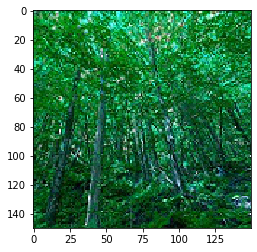

In [74]:
POSITION = random.choice(validation_data)
POSITION = validation_data.index(POSITION)
print(POSITION)
plt.imshow(validation_data[POSITION]['processed_data'])
print(CLASS[predict_image(validation_data[POSITION]['processed_data'])].upper())

glacier


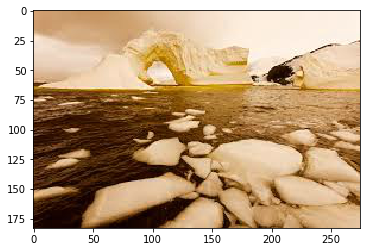

In [63]:
URL = r'/Users/nyvara/Desktop/MyFiles/ML_FILES/ImageClassification/customImages/glacier.jpeg'
print(CLASS[process_custom_data(URL)])